In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_ori = pd.read_csv('data/gdf_final.csv').dropna()


X_col = [
    'dist',
    'delta_time',
    'trip_hour',
    'avgtemp',
    'population_16_with_earnings',
    'median_earnings_(dollars)',
    'median_age_(years)'
]
y_col = ['usage_counts']
classes = ['low', 'mid', 'high']
X = df_ori[X_col]
y = df_ori[y_col]
y.describe()


,usage_counts
count,119372.000000
mean,6.516545
std,7.392065
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,96.000000


In [ ]:
y = pd.cut(df_ori[y_col].to_numpy().flatten(), [
           0, 2, 7, 96], labels=classes).tolist()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
Counter(y)


Counter({'high': 33871, 'mid': 41726, 'low': 43775})

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)


(0.9971831575861022, 0.5804397905759162)

# Evaluate min_impurity_decrease

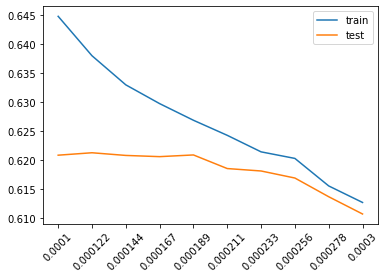

In [ ]:
import numpy as np
n = 10
test_score_list = np.zeros(n)
train_score_list = np.zeros(n)
decrease_list = [round(i, 6) for i in np.linspace(0.0001, 0.0003, n)]
for idx, i in enumerate(decrease_list):
    clf = DecisionTreeClassifier(min_impurity_decrease=i,
                                 criterion='entropy', random_state=0)
    clf.fit(X_train, y_train)
    train_score_list[idx] = clf.score(X_train, y_train)
    test_score_list[idx] = clf.score(X_test, y_test)
plt.plot(list(range(n)), train_score_list, label='train')
plt.plot(list(range(n)), test_score_list, label='test')
plt.xticks(list(range(n)), decrease_list, rotation=45)
plt.legend()


In [ ]:
# decrease = decrease_list[np.argmax(test_score_list)]
decrease = 0.000189
clf = DecisionTreeClassifier(min_impurity_decrease=decrease,
                             criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)


(0.6268364451239306, 0.6208586387434555)

# Evaluate Max Depth

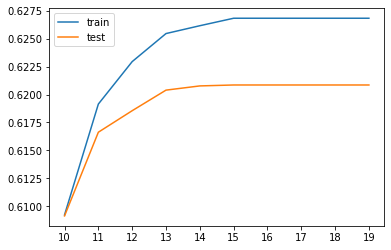

In [ ]:
n = 10
test_score_list = np.zeros(n)
train_score_list = np.zeros(n)
depth_list = [i+10 for i in range(n)]
for idx, i in enumerate(depth_list):
    clf = DecisionTreeClassifier(min_impurity_decrease=decrease, max_depth=i,
                                 criterion='entropy', random_state=0)
    clf.fit(X_train, y_train)
    train_score_list[idx] = clf.score(X_train, y_train)
    test_score_list[idx] = clf.score(X_test, y_test)
plt.plot(list(range(n)), train_score_list, label='train')
plt.plot(list(range(n)), test_score_list, label='test')
plt.xticks(list(range(n)), depth_list)
plt.legend()


In [ ]:
# depth = depth_list[np.argmax(test_score_list)]
depth = 13
clf = DecisionTreeClassifier(min_impurity_decrease=decrease, max_depth=depth,
                             criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)


(0.6254646742829618, 0.6203979057591623)

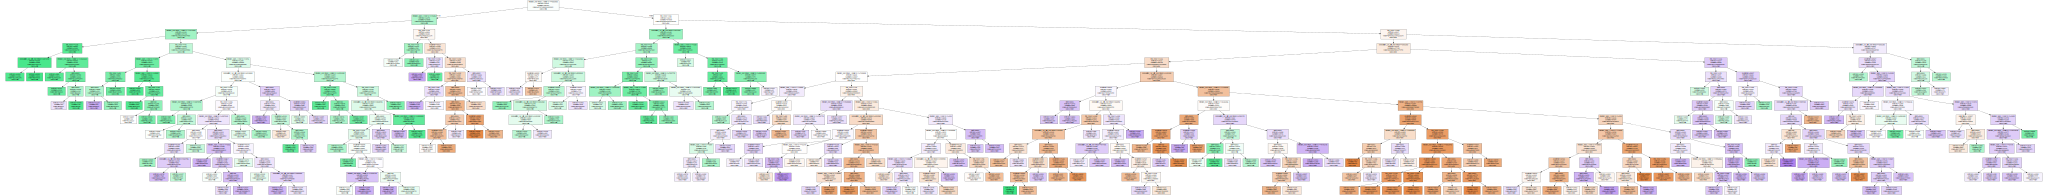

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_col,
                                class_names=classes,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph


In [ ]:
graph.render('graph/DT_tree')


'graph\\DT_tree.png'